# Random Forests -- One Family vs Others

In [1]:
from locator import *
import seaborn as sns
%matplotlib inline

In [2]:
nig04 = pd.read_pickle('feature-sets/800-Niger-80-04.pkl')
nigrnd = pd.read_pickle('feature-sets/800-Niger-80-rnd.pkl')

nig04 = [ColGroup(g) for g in nig04]
nigrnd = [ColGroup(g) for g in nigrnd]

In [3]:
def rfstats(column_groups,family):
    #groups = [ColGroup(g) for g in column_groups]
    stats = pd.DataFrame(index=range(len(column_groups)), \
        columns=['oob','precision','recall','f-measure','rerror','silhouette'])
    for i,g in enumerate(column_groups):
        g.gen_separation(family=family)
        g.family_rfs(family)
        stats.iloc[i][g.family_rfs_data[family].columns] = g.family_rfs_data[family].mean()
        stats.iloc[i]['silhouette'] = g.best_silhouette(family)[0]
    return stats.astype(float)

## Good Silhouettes:
### Criteria:
    
  1. No area restriction
  
  2. At least 80 Niger-Congo
  
  3. At least 800 total
  
  4. At least 0.4 Silhoutte of Niger-Congo vs. Others
  
  
### General Statistics:

In [4]:
stats = rfstats(nig04,"Niger-Congo")
stats.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,0.154794,0.808758,0.906728,0.854140,0.093272,0.418840
std,0.024661,0.025185,0.036543,0.024220,0.036543,0.020894
min,0.116807,0.717889,0.766292,0.779316,0.055446,0.400126
25%,0.137898,0.791152,0.898031,0.841611,0.070970,0.404976
50%,0.150909,0.811943,0.919836,0.859332,0.080164,0.411001
75%,0.171240,0.826224,0.929030,0.870461,0.101969,0.426984
max,0.223140,0.858611,0.944554,0.889804,0.233708,0.509783


## Relation to Silhouette

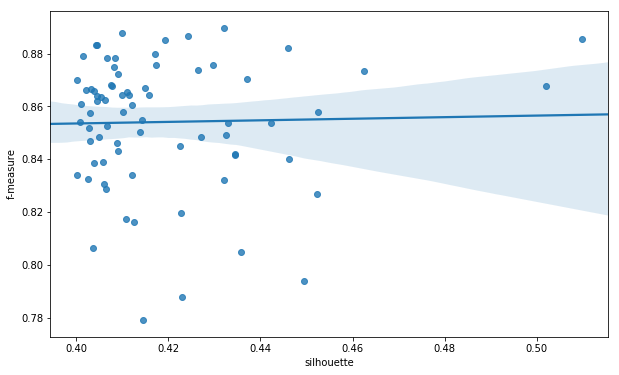

In [5]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=stats, ax=ax);

In [6]:
stats.corr()

,oob,precision,recall,f-measure,rerror,silhouette
oob,1.000000,-0.843339,-0.690311,-0.982480,0.690311,-0.026975
precision,-0.843339,1.000000,0.196327,0.731714,-0.196327,0.053883
recall,-0.690311,0.196327,1.000000,0.811372,-1.000000,-0.005881
f-measure,-0.982480,0.731714,0.811372,1.000000,-0.811372,0.025718
rerror,0.690311,-0.196327,-1.000000,-0.811372,1.000000,0.005881
silhouette,-0.026975,0.053883,-0.005881,0.025718,0.005881,1.000000


In [10]:
nig04.sort(key=lambda g : g.family_rfs_data['Niger-Congo']['oob'].mean())

In [11]:
for g in nig04[:3]:
    print(g)
    print("---\n\n")

3 long group covering 911 languages
in mode PCA:
quality index: 7.42
PC1: 44%
PC2: 21%
fields: 'word_order': 3
features:
81A Order of Subject, Object and Verb
88A Order of Demonstrative and Noun
89A Order of Numeral and Noun
family1: 138 (Austronesian)
family2: 119 (Niger-Congo)
silhouettes:
Niger-Congo: 0.43 (1 PCs)


Niger-Congo vs others: oob: 0.117 f-measure: 0.890 (5 samples)
---


4 long group covering 869 languages
in mode PCA:
quality index: 8.12
PC1: 25%
PC2: 21%
fields: 'word_order': 4
features:
143A Order of Negative Morpheme and Verb
81A Order of Subject, Object and Verb
89A Order of Numeral and Noun
97A Relationship between the Order of Object and Verb and the Order of Adjective and Noun
family1: 131 (Austronesian)
family2: 110 (Niger-Congo)
silhouettes:
Niger-Congo: 0.51 (1 PCs)


Niger-Congo vs others: oob: 0.118 f-measure: 0.886 (5 samples)
---


3 long group covering 836 languages
in mode PCA:
quality index: 6.27
PC1: 39%
PC2: 26%
fields: 'word_order': 3
features:
81A 

## Relation to Silhouette in General
### Criteria:
    
  1. No area restriction
  
  2. At least 80 Niger-Congo
  
  3. At least 800 total

### Groups: a random sample of 1000 groups of meeting these criteria
  

In [12]:
rndstats = pd.read_pickle('tmp1000rndnigstats.pkl')
#rndstats = rfstats(nigrnd,"Niger-Congo")
rndstats.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.189828,0.788512,0.851713,0.817023,0.148287,0.238969
std,0.036014,0.034780,0.063378,0.037685,0.063378,0.068204
min,0.108943,0.614439,0.645545,0.662899,0.034940,0.065045
25%,0.166667,0.774269,0.814702,0.796765,0.096412,0.194786
50%,0.185502,0.792775,0.862436,0.823209,0.137564,0.250002
75%,0.207646,0.811182,0.903588,0.843551,0.185298,0.284846
max,0.367901,0.862069,0.965060,0.896297,0.354455,0.436989


In [13]:
#with open('tmp1000rndnigstats.pkl','wb') as f:
#    pickle.dump(rndstats,f)

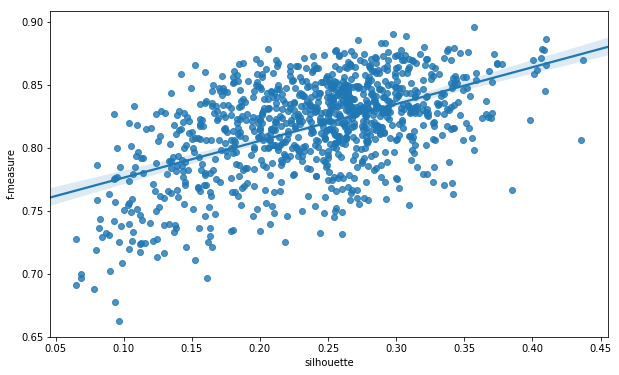

In [14]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=rndstats, ax=ax);

In [15]:
rndstats.corr()

,oob,precision,recall,f-measure,rerror,silhouette
oob,1.000000,-0.772618,-0.716462,-0.970897,0.716462,-0.467987
precision,-0.772618,1.000000,0.116933,0.603923,-0.116933,0.179215
recall,-0.716462,0.116933,1.000000,0.860160,-1.000000,0.553232
f-measure,-0.970897,0.603923,0.860160,1.000000,-0.860160,0.528154
rerror,0.716462,-0.116933,-1.000000,-0.860160,1.000000,-0.553232
silhouette,-0.467987,0.179215,0.553232,0.528154,-0.553232,1.000000


## Austronesian

In [16]:
rndstats_aus = rfstats(nigrnd,"Austronesian")

In [17]:
rndstats_aus.describe()

,oob,precision,recall,f-measure,rerror,silhouette
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.245196,0.723954,0.828635,0.771715,0.171365,0.213034
std,0.025107,0.029104,0.034534,0.023150,0.034534,0.063450
min,0.168293,0.602259,0.372059,0.485623,0.075000,0.035093
25%,0.231789,0.707064,0.808677,0.760576,0.147761,0.168672
50%,0.245123,0.721560,0.831152,0.772400,0.168848,0.220535
75%,0.258655,0.736280,0.852239,0.784179,0.191323,0.258868
max,0.394118,0.812559,0.925000,0.838518,0.627941,0.381682


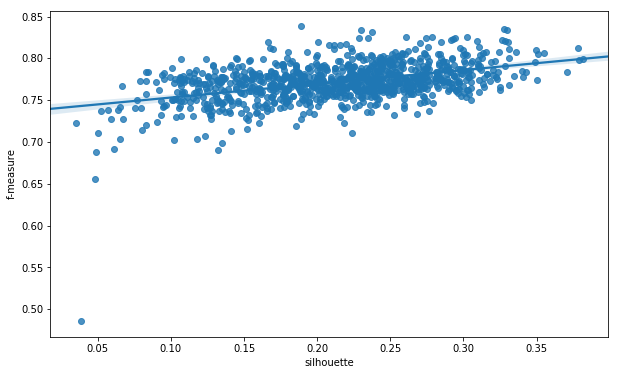

In [18]:
fig,ax  = plt.subplots(figsize=(10,6))
sns.regplot(x="silhouette", y="f-measure", data=rndstats_aus, ax=ax);